# Prototipo 2

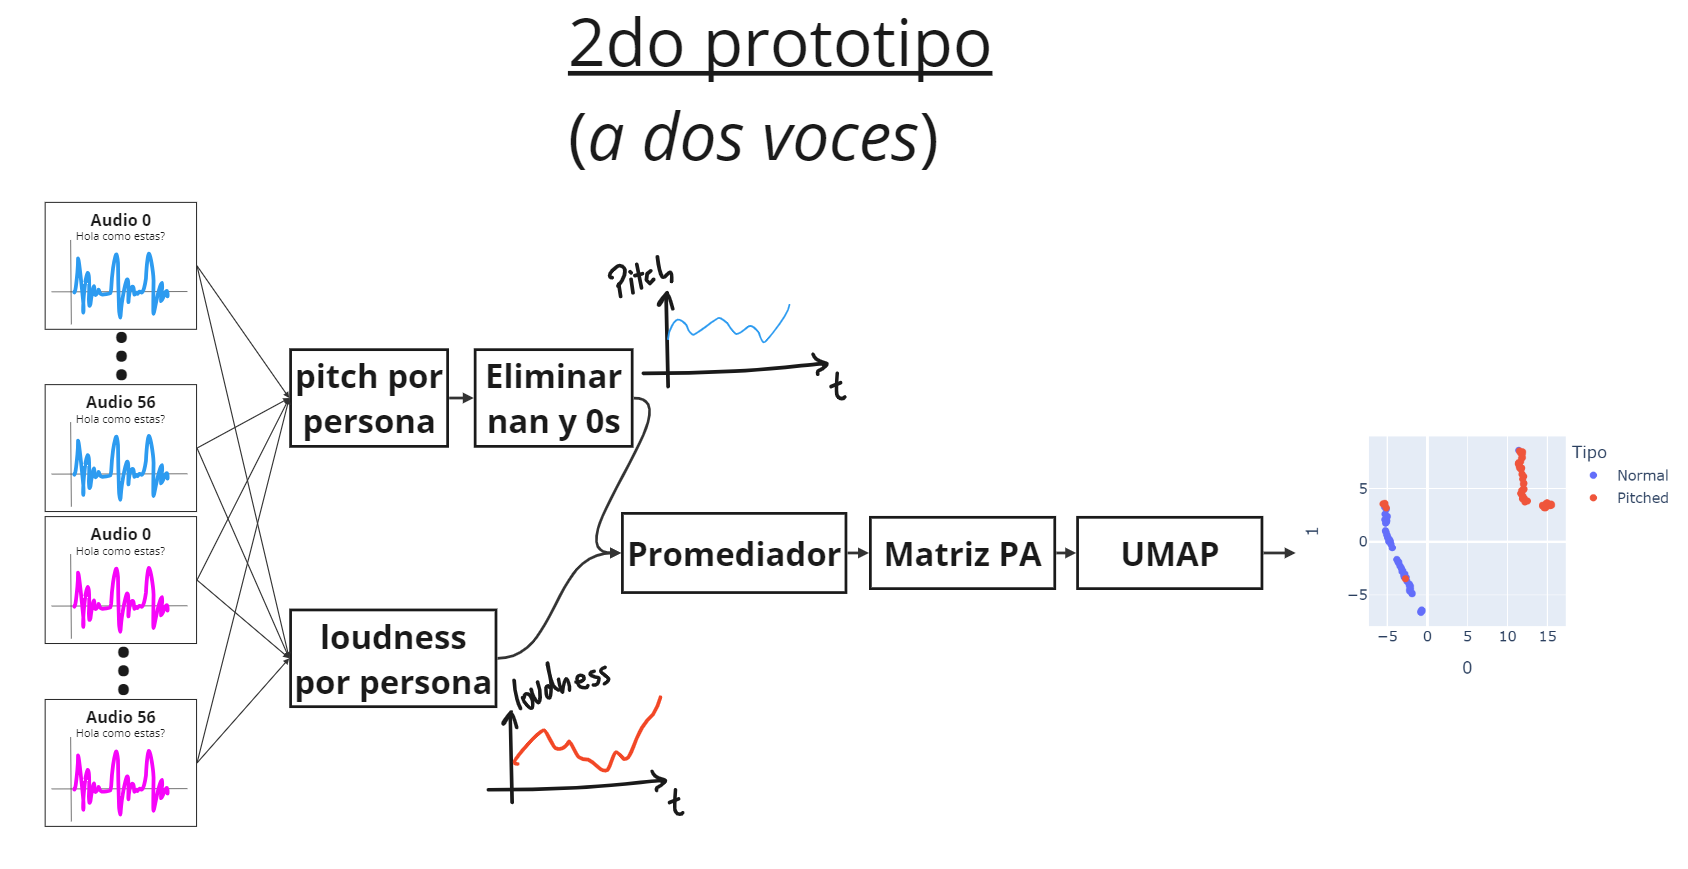

In [50]:
import librosa
import math

def PitchPorPersona(y,sr):
    f0, voiced_flag, voiced_probs=librosa.pyin(
        y,
        fmin=librosa.note_to_hz('C2'),
        fmax=librosa.note_to_hz('C7'),
        sr=sr)
    f0 = [x for x in f0 if not isinstance(x, float) or not math.isnan(x)]
    f0 = [i for i in f0 if i != 0]
    return f0

In [51]:
import numpy as np

def Promediador(x):
    return np.mean(x)

In [52]:
import pyloudnorm as pyln
import librosa 

def LoudnessPorPersona(y,sr):
    meter = pyln.Meter(sr)
    loudness = meter.integrated_loudness(y)
    return loudness

In [53]:
import pandas as pd

def CalculadoraParametrosAcusticos(path_carpeta, nombre, cant_audios, extension, cant_basesdedatos):
    df = pd.DataFrame(columns=['Pitch', 'Loudness','Tipo','Archivo'])
    for j in range(cant_basesdedatos):
        for i in range(cant_audios):
            name = f'{nombre[j]}{i}'
            path = f'{path_carpeta}/{nombre[j]}{i}.{extension[j]}'    
            y,sr = librosa.load(path)
            p=Promediador(PitchPorPersona(y,sr))
            l=Promediador(LoudnessPorPersona(y,sr))
            if j==0:
                variable_tipo = 'Normal' 
            elif j==1:
                variable_tipo = 'Pitched'
            df = df.append({'Pitch':p, 'Loudness':l,'Tipo':variable_tipo,'Archivo':name},ignore_index=True)
    return df

In [ ]:
path_carpeta = 'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/Prototipos/Prototipo2/Audios'
nombre = ['HolaComoEstas','HolaComoEstasPitched']
extension = ['opus','wav']
cant_audios = 56
cant_basesdedatos = 2

BaseDeDatos=CalculadoraParametrosAcusticos(path_carpeta,nombre,cant_audios,extension,cant_basesdedatos)

In [55]:
import umap.umap_ as umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler

reducer = umap.UMAP()
pitch = BaseDeDatos['Pitch']
pitch = np.asarray(pitch)
pitch = pitch.reshape(-1, 1)
scaled_pitch = StandardScaler().fit_transform(pitch) # estandariza los valores

embedding = reducer.fit_transform(pitch) 

In [78]:
Archivo = BaseDeDatos['Archivo'].tolist()
Pitch = BaseDeDatos['Pitch'].tolist()

In [79]:
import plotly.express as px

fig = px.scatter(
    embedding,
    x=0,
    y=1,
    color=BaseDeDatos.Tipo,
    labels={'color': 'Tipo'},
    hover_data=[Archivo,Pitch]
)

fig.update_layout(
    title='Scatter plot MapaDeVoces',
    xaxis_title='X',
    yaxis_title='Y',
    autosize=True,
    width=800,
    height=500
)
fig.show()

In [66]:
print(BaseDeDatos.loc[111,'Pitch'])

266.0121151025088


In [62]:
print(BaseDeDatos)

          Pitch   Loudness     Tipo                 Archivo
0    172.352430 -24.495072   Normal          HolaComoEstas0
1    238.042951 -22.695764   Normal          HolaComoEstas1
2    164.844151 -24.297777   Normal          HolaComoEstas2
3    138.769652 -25.360511   Normal          HolaComoEstas3
4    159.110702 -25.987264   Normal          HolaComoEstas4
..          ...        ...      ...                     ...
107  269.861462 -22.699238  Pitched  HolaComoEstasPitched51
108  287.064942 -22.519649  Pitched  HolaComoEstasPitched52
109  281.643668 -22.945172  Pitched  HolaComoEstasPitched53
110  276.706333 -23.413719  Pitched  HolaComoEstasPitched54
111  266.012115 -23.863012  Pitched  HolaComoEstasPitched55

[112 rows x 4 columns]


In [80]:
import plotly.express as px
import pandas as pd

# Sample data
data = {
    'X': [1, 2, 3, 4, 5],
    'Y': [10, 15, 13, 18, 20],
    'Labels': ['A', 'B', 'C', 'D', 'E'],
    'Info_1': ['Info A', 'Info B', 'Info C', 'Info D', 'Info E'],
    'Info_2': ['Category 1', 'Category 2', 'Category 1', 'Category 3', 'Category 2']
}

df = pd.DataFrame(data)

# Creating a scatter plot using Plotly Express
fig = px.scatter(df, x='X', y='Y', text='Labels', hover_data=['Info_1', 'Info_2'])

# Update layout or other configurations if needed
fig.update_layout(
    title='Scatter Plot with Multiple Additional Information',
    xaxis_title='X-axis',
    yaxis_title='Y-axis',
)

# Show the plot
fig.show()